# Titanic Survival Prediction with Logistic Regression

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Import Data

In [2]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

## Target 

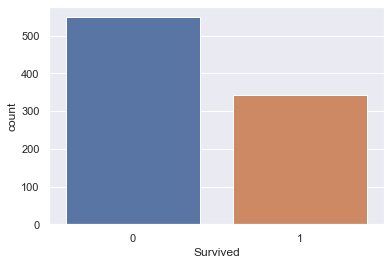

In [3]:
sns.countplot(df.Survived);

Target variabel kita balanced.

## Statistik Deskriptif

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connors, Mr. Patrick",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## Numeric vs Target

### Age

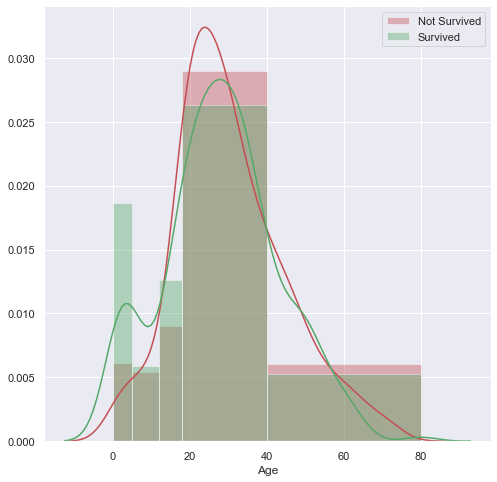

In [6]:
plt.figure(figsize=(8, 8))
sns.distplot(df.Age[df.Survived==0], bins=[0, 5, 12, 18, 40, 80], color='r', label='Not Survived')
sns.distplot(df.Age[df.Survived==1], bins=[0, 5, 12, 18, 40, 80], color='g', label='Survived')
plt.legend();

Adapun insight yang dapat ditarik adalah sebagai berikut : 
* Balita dan anak-anak ternyata lebih signifikan yang survived.
* Dewasa ternyata banyak yang tidak survived walaupun tidak begitu signifikan. 
* Lansia ternyata banyak yang tidak survived walaupun tidak begitu signifikan. 

### Fare

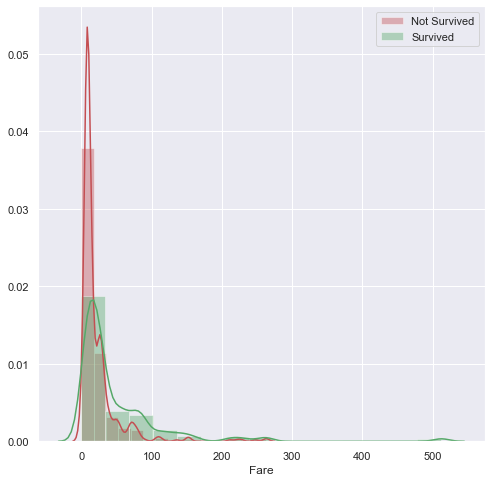

In [7]:
plt.figure(figsize=(8, 8))
sns.distplot(df.Fare[df.Survived==0], bins=15, color='r', label='Not Survived')
sns.distplot(df.Fare[df.Survived==1], bins=15, color='g', label='Survived')
plt.legend();

Adapun insight yang dapat ditarik adalah sebagai berikut :  
* Fare dibawah 50 sangat signifikan tidak survived.
* Fare diatas 50 cukup signifikan survived.

## Categoric vs Target

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


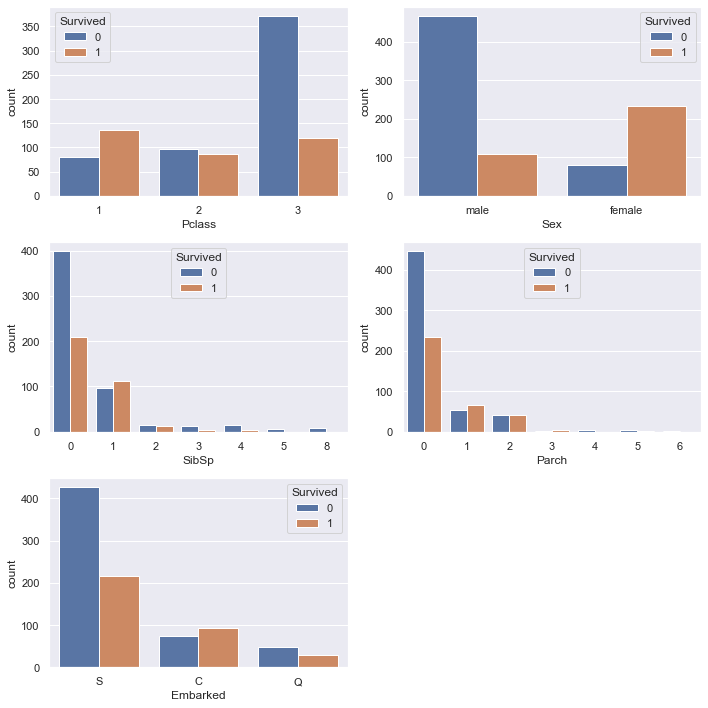

In [9]:
categoric = ['Pclass','Sex','SibSp','Parch','Embarked']
a = plt.figure(figsize=(10,10))

for i, j in enumerate(categoric):
    a.add_subplot(3, 2, i+1)
    sns.countplot(df[j], hue='Survived', data=df)
    a.tight_layout()

Adapun insight yang dapat ditarik adalah sebagai berikut : 
* Pclass 3 sangat signifikan yang tidak survived. 
* Sex male sangat signifikan yang tidak survived dan female cukup signifikan yang survived.
* SibSp 0 signifikan tidak survived. 
* Parch 0 signifikan tidak survived. 
* Embarked dari S (southamphton) signifikan tidak survived. 

In [10]:
df[df.Pclass == 1].mean()

Survived     0.629630
Pclass       1.000000
Age         38.233441
SibSp        0.416667
Parch        0.356481
Fare        84.154687
dtype: float64

Dari hasil visualisasi-visualisasi di atas saya coba memberikan rangkuman insight penting yang saya dapatkan pada numeric vs target dan catagoric vs target.
* Biasanya dalam bencana balita, anak-anak dan wanita akan didahulukan untuk diselamatkan dan hal itu sepertinya terjadi pula pada kasus kapal titanic.
* Fare diatas 50 cenderung survived dan Pclass 1 memiliki mean diatas 50 maka dari itu kita lihat Pclass 1 lebih banyak yang survived daripada Pclass lain. 
* Mungkin selain Pclass 1 lebih mahal bisa jadi di Pclass tersebut banyak orang-orang penting yang bisa menjadi prioritas penyelamatan selain balita, anak-anak dan wanita.
* Saya akan menambahkan fitur baru dengan nama : Male_in_3 yang merupakan gabungan dari Sex male dan berada di Pclass 3.
* Saya akan menambahkan fitur baru dengan nama : Alone yang merupakan gabungan dari SibSp 0 dan Parch 0. 

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Kemudian Name akan saya ekstrak gelarnya karena bisa jadi orang-orang dengan gelar tertentu bisa menjadi prioritas dalam penyelamatan karena merupakan orang-orang penting.

## Add New Features

### Male_in_3

In [12]:
df['Male_in_3'] = (df.Sex == 'male') & (df.Pclass == 3)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male_in_3
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [13]:
df.Male_in_3.value_counts()

False    544
True     347
Name: Male_in_3, dtype: int64

### Alone

In [14]:
df['Alone'] = (df.SibSp == 0) & (df.Parch == 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male_in_3,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,True


In [15]:
df.Alone.value_counts()

True     537
False    354
Name: Alone, dtype: int64

### Title 

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male_in_3,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,True


In [17]:
df['Title'] = df.Name.apply(lambda x: x.split(', ')[1].split('. ')[0])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,True,Mr


In [18]:
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Lady              1
Ms                1
Jonkheer          1
Sir               1
Capt              1
Don               1
the Countess      1
Name: Title, dtype: int64

Title dengan frekuensi sedikit akan kita buat menjadi satu kategori yaitu : other.

In [19]:
def rubah_title(x):
    if x in ['Mr','Miss','Mrs','Master']:
        return x 
    else: 
        return 'other'

In [20]:
df.Title = df.Title.apply(rubah_title)

In [21]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,True,Mr


In [22]:
df.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: Title, dtype: int64

In [23]:
df.drop(columns=['Name','Ticket','Cabin'], axis=1, inplace=True)

In [24]:
df.shape

(891, 11)

## Dataset Splitting

In [25]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

## Modeling

In [26]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.linear_model import LogisticRegression

In [27]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [28]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,
693,3,male,NaN,0,0,56.4958,S,True,True,Mr
482,2,male,NaN,0,0,0.0000,S,False,True,Mr
528,1,male,NaN,0,0,221.7792,S,False,True,Mr
856,3,female,18.0,0,1,9.3500,S,False,False,Mrs
802,2,female,31.0,1,1,26.2500,S,False,False,Mrs


In [29]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['Age','SibSp','Parch','Fare']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass','Sex','Embarked','Male_in_3','Alone','Title']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.8384831460674157 0.8259135230966216 0.8547486033519553


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.3s finished


Ternyata setelah ditambahkan beberapa fitur baru dan dilakukan robust scaling terjadi kenaikan skor (akurasi) yang cukup signifikan pada train, val dan terutama pada test yang naik >4%.

## Features Important

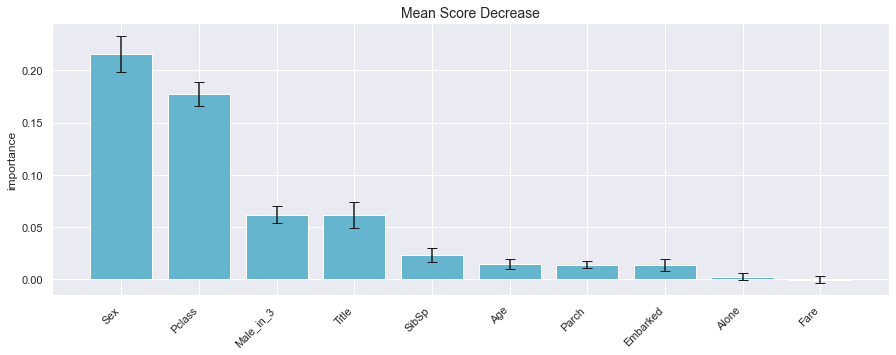

In [30]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

Ternyata fitur Sex diikuti oleh Pclass dengan selisih yang tidak begitu jauh menjadi fitur paling penting untuk memprediksi survived atau tidaknya seseorang.

## Polynomial Features

In [31]:
gsp.logreg_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [32]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust', poly=2), ['Age','SibSp','Parch','Fare']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass','Sex','Embarked','Male_in_3','Alone','Title']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_poly_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.4s


{'algo__C': 10.0, 'algo__fit_intercept': False, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.8441011235955056 0.830089628681178 0.8324022346368715


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   16.4s finished


Setelah dilakukan polynomial features terjadi kenaikan pada train dan val namun, terjadi penurunan pada test.

## Fine Tuning

In [33]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [34]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['Age','SibSp','Parch','Fare']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass','Sex','Embarked','Male_in_3','Alone','Title']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


parameter = {'algo__fit_intercept': [True, False],
             'algo__C': [10, 11, 12]}


model = GridSearchCV(pipeline, parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'algo__C': 10, 'algo__fit_intercept': True}
0.8384831460674157 0.8259135230966216 0.8547486033519553


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


Setelah dilakukan fine tuning saya mengambil kesimpulan bahwa model telah mendapatkan hyperparameter yang optimal.

## Evaluasi

In [35]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve

In [36]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       439
           1       0.83      0.73      0.77       273

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.82       712
weighted avg       0.84      0.84      0.84       712


Test report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       110
           1       0.88      0.72      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



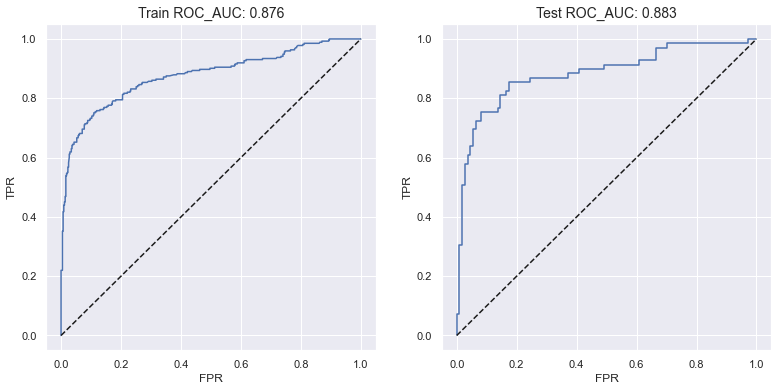

In [37]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

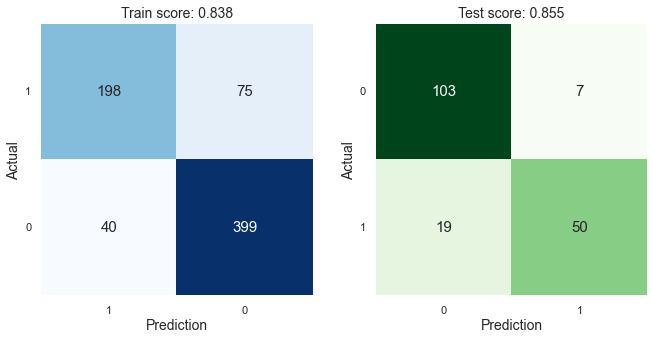

In [38]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

Jika kita lihat pada confusion matrix terjadi perbaikan yang signifikan dibandingkan sebelumnya.

## Coba cek datanya

In [39]:
df_analisis = X_train.copy()
df_analisis['pred'] = model.predict(X_train)
df_analisis['actual'] = y_train.copy()
df_analisis.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title,pred,actual
PassengerId,,,,,,,,,,,,
693,3,male,NaN,0,0,56.4958,S,True,True,Mr,0,1
482,2,male,NaN,0,0,0.0000,S,False,True,Mr,0,0
528,1,male,NaN,0,0,221.7792,S,False,True,Mr,0,0
856,3,female,18.0,0,1,9.3500,S,False,False,Mrs,1,1
802,2,female,31.0,1,1,26.2500,S,False,False,Mrs,1,1


In [40]:
df_prec = df_analisis[(df_analisis.pred == 0) & (df_analisis.actual == 1)]
df_prec.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title,pred,actual
PassengerId,,,,,,,,,,,,
693,3,male,NaN,0,0,56.4958,S,True,True,Mr,0,1
510,3,male,26.0,0,0,56.4958,S,True,True,Mr,0,1
829,3,male,NaN,0,0,7.7500,Q,True,True,Mr,0,1
648,1,male,56.0,0,0,35.5000,C,False,True,other,0,1
227,2,male,19.0,0,0,10.5000,S,False,True,Mr,0,1
221,3,male,16.0,0,0,8.0500,S,True,True,Mr,0,1
431,1,male,28.0,0,0,26.5500,S,False,True,Mr,0,1
205,3,male,18.0,0,0,8.0500,S,True,True,Mr,0,1
108,3,male,NaN,0,0,7.7750,S,True,True,Mr,0,1


In [41]:
df_prec.Sex.value_counts()

male      65
female    10
Name: Sex, dtype: int64

In [42]:
df_recall = df_analisis[(df_analisis.pred == 1) & (df_analisis.actual == 0)]
df_recall

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title,pred,actual
PassengerId,,,,,,,,,,,,
558,1,male,NaN,0,0,227.5250,C,False,True,Mr,1,0
403,3,female,21.0,1,0,9.8250,S,False,False,Miss,1,0
265,3,female,NaN,0,0,7.7500,Q,False,True,Miss,1,0
475,3,female,22.0,0,0,9.8375,S,False,True,Miss,1,0
206,3,female,2.0,0,1,10.4625,S,False,False,Miss,1,0
655,3,female,18.0,0,0,6.7500,Q,False,True,Miss,1,0
374,1,male,22.0,0,0,135.6333,C,False,True,Mr,1,0
416,3,female,NaN,0,0,8.0500,S,False,True,Mrs,1,0
115,3,female,17.0,0,0,14.4583,C,False,True,Miss,1,0


In [43]:
df_recall.Sex.value_counts()

female    33
male       7
Name: Sex, dtype: int64

Jika dibandingkan dengan model sebelumnya memang model yang baru ini lebih baik, itu berarti fitur yang baru ditambahkan dapat membantu model dalam melakukan prediksi dengan lebih baik.

## Save Model

In [44]:
save_model(model.best_estimator_, "titanic_v2.pkl")

Model is pickled as model/titanic_v2.pkl


# Try Binning

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,True,False,Mr
2,1,1,female,38.0,1,0,71.2833,C,False,False,Mrs
3,1,3,female,26.0,0,0,7.9250,S,False,True,Miss
4,1,1,female,35.0,1,0,53.1000,S,False,False,Mrs
5,0,3,male,35.0,0,0,8.0500,S,True,True,Mr


## Binning Age 

In [46]:
df.Age = pd.cut(df.Age, bins=[0,5,12,18,40,80], labels=['balita','anak-anak','remaja','dewasa','lansia'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,True,False,Mr
2,1,1,female,dewasa,1,0,71.2833,C,False,False,Mrs
3,1,3,female,dewasa,0,0,7.9250,S,False,True,Miss
4,1,1,female,dewasa,1,0,53.1000,S,False,False,Mrs
5,0,3,male,dewasa,0,0,8.0500,S,True,True,Mr


## Binning Fare

In [47]:
df.Fare = pd.cut(df.Fare, bins=3, labels=['murah','menengah','mahal'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,True,False,Mr
2,1,1,female,dewasa,1,0,murah,C,False,False,Mrs
3,1,3,female,dewasa,0,0,murah,S,False,True,Miss
4,1,1,female,dewasa,1,0,murah,S,False,False,Mrs
5,0,3,male,dewasa,0,0,murah,S,True,True,Mr


## Dataset Splitting

In [48]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

## Modeling

In [49]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [50]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title
PassengerId,,,,,,,,,,
693,3,male,NaN,0,0,murah,S,True,True,Mr
482,2,male,NaN,0,0,murah,S,False,True,Mr
528,1,male,NaN,0,0,menengah,S,False,True,Mr
856,3,female,remaja,0,1,murah,S,False,False,Mrs
802,2,female,dewasa,1,1,murah,S,False,False,Mrs


In [51]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['SibSp','Parch']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass','Sex','Age','Fare','Embarked','Male_in_3','Alone','Title']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.2s finished


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.8426966292134831 0.8273219738008472 0.8268156424581006


Setelah dilakukan binning terjadi kenaikan pada train dan val namun, terjadi penurunan pada test sekitar ± 2 %. 

## Features Important 

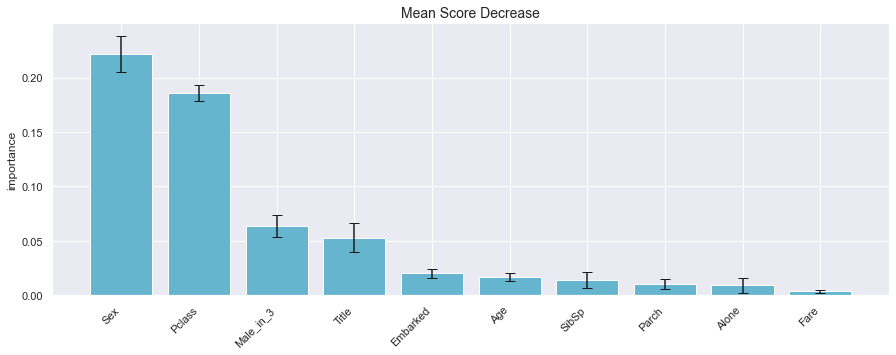

In [52]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

Sex diikuti Pclass tetap menjadi fitur paling penting dalam memprediksi survived atau tidaknya seseorang.

## Polynomial Features

In [53]:
gsp.logreg_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [54]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['SibSp','Parch']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass','Sex','Age','Fare','Embarked','Male_in_3','Alone','Title']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_poly_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 413 out of 420 | elapsed:   14.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   14.4s finished


{'algo__C': 10.0, 'algo__fit_intercept': True, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8412921348314607 0.8273219738008472 0.8268156424581006


Setelah dilakukan polynomial features terjadi sedikit penurunan pada train dan tidak berpengaruh pada val dan test.

## Fine Tuning

In [55]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [56]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['SibSp','Parch']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass','Sex','Age','Fare','Embarked','Male_in_3','Alone','Title']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


parameter = {'algo__fit_intercept': [True, False],
             'algo__C': [10, 11, 12]}


model = GridSearchCV(pipeline, parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 10, 'algo__fit_intercept': True}
0.8426966292134831 0.8273219738008472 0.8268156424581006


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


Model telah mendapatkan hyperparameter yang optimal.

## Evaluasi

In [57]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       439
           1       0.86      0.71      0.78       273

    accuracy                           0.84       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712


Test report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.67      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



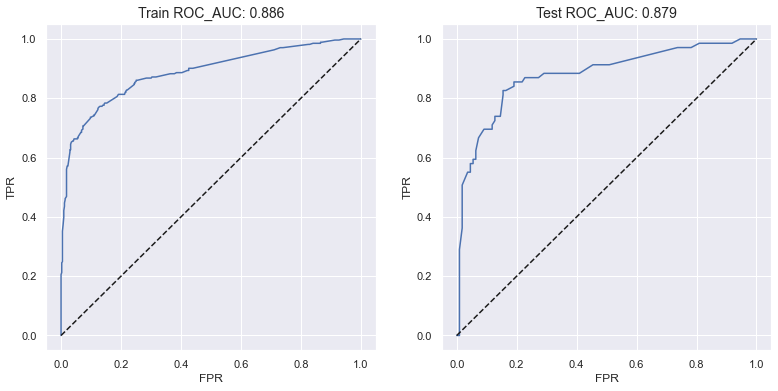

In [58]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

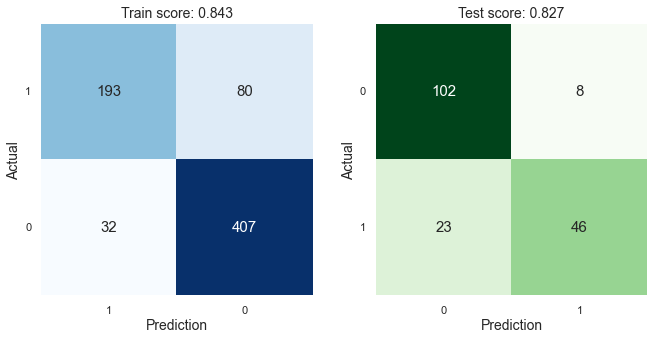

In [59]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

Binning pada kasus ini tidak begitu membantu malah terjadi penurunan skor pada test. Sehingga dapat dikatakan model prediksi lebih baik tanpa binning. 

## Save Model

In [60]:
save_model(model.best_estimator_, "titanic_v3.pkl")

Model is pickled as model/titanic_v3.pkl


## Load Model
Kita akan coba load model terbaik (titanic_v2.pkl) dan buat prediksi untuk data baru.

In [61]:
model = load_model('model/titanic_v2.pkl')

In [62]:
new_df = [[3, 'male', 35, 0, 0, 8.5, 'S', 'True', 'True', 'Other'], 
         [1, 'female', 35, 1, 0, 53.1000, 'S', 'False', 'False', 'Mrs']]

X_pred = pd.DataFrame(new_df, columns=X_train.columns)
X_pred

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title
0,3,male,35,0,0,8.5,S,True,True,Other
1,1,female,35,1,0,53.1,S,False,False,Mrs


In [63]:
X_pred['Survived'] = model.predict(X_pred)
X_pred

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_in_3,Alone,Title,Survived
0,3,male,35,0,0,8.5,S,True,True,Other,0
1,1,female,35,1,0,53.1,S,False,False,Mrs,1
